# データを見てみる


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from pathlib import Path
import pandas as pd
import os

data_1016 = Path('./data/USD_JPY/20181016.csv')
df_1016 = pd.read_csv(data_1016, header=None).rename(columns={0: 'date', 1:'price'})
df_1016

,date,price
0,2018-10-15 12:58:50,112.072
1,2018-10-15 12:58:55,112.069
2,2018-10-15 12:59:00,112.069
3,2018-10-15 12:59:05,112.067
4,2018-10-15 12:59:10,112.065
5,2018-10-15 12:59:15,112.053
6,2018-10-15 12:59:20,112.053
7,2018-10-15 12:59:25,112.053
8,2018-10-15 12:59:30,112.053
9,2018-10-15 12:59:35,112.053


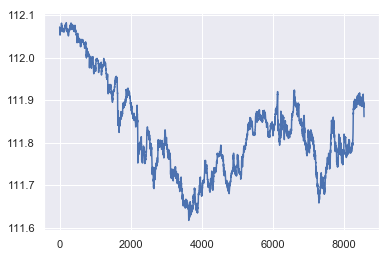

In [3]:
# とりあえずplotしてみる
plt.plot(df_1016['price'])
plt.show()

In [4]:
# sliding window
def slide_data(df, window_size, label_pos, inc_date=False):
    """
    input:
        df: dataframe
        window_size: int 基準位置から負の方向に何個のデータを予測に用いるか
        label_pos: 基準位置から正の方向に何個めのデータを予測するか
    output:
        df_slide: dataframe{index_date: 基準のdate,
                                    　数値: 基準＋数値ばんめのprice
                                       label:  label 位置のprice}
    """
    d = []
    # 各カラムのデータを準備
    if inc_date:
        d.append(('index_date', list(df['date'][window_size-1:-label_pos])))
    slide_d = {}
    for i in range(window_size)[::-1]:
        d.append((-i, list(df['price'][window_size-1-i:-label_pos-i])))
    d.append(('label', list(df['price'][window_size+label_pos-1:])))
    return pd.DataFrame({i: v for i, v in d})


In [5]:
# 直前5分=>30秒後
df_1016_slide = slide_data(df_1016, 60, 60) 
df_1016_slide

,-59,-58,-57,-56,-55,-54,-53,-52,-51,-50,...,-8,-7,-6,-5,-4,-3,-2,-1,0,label
0,112.072,112.069,112.069,112.067,112.065,112.053,112.053,112.053,112.053,112.053,...,112.081,112.079,112.079,112.074,112.074,112.074,112.076,112.076,112.074,112.062
1,112.069,112.069,112.067,112.065,112.053,112.053,112.053,112.053,112.053,112.053,...,112.079,112.079,112.074,112.074,112.074,112.076,112.076,112.074,112.074,112.062
2,112.069,112.067,112.065,112.053,112.053,112.053,112.053,112.053,112.053,112.053,...,112.079,112.074,112.074,112.074,112.076,112.076,112.074,112.074,112.074,112.060
3,112.067,112.065,112.053,112.053,112.053,112.053,112.053,112.053,112.053,112.053,...,112.074,112.074,112.074,112.076,112.076,112.074,112.074,112.074,112.074,112.062
4,112.065,112.053,112.053,112.053,112.053,112.053,112.053,112.053,112.053,112.053,...,112.074,112.074,112.076,112.076,112.074,112.074,112.074,112.074,112.070,112.062
5,112.053,112.053,112.053,112.053,112.053,112.053,112.053,112.053,112.053,112.063,...,112.074,112.076,112.076,112.074,112.074,112.074,112.074,112.070,112.070,112.062
6,112.053,112.053,112.053,112.053,112.053,112.053,112.053,112.053,112.063,112.063,...,112.076,112.076,112.074,112.074,112.074,112.074,112.070,112.070,112.067,112.062
7,112.053,112.053,112.053,112.053,112.053,112.053,112.053,112.063,112.063,112.063,...,112.076,112.074,112.074,112.074,112.074,112.070,112.070,112.067,112.067,112.062
8,112.053,112.053,112.053,112.053,112.053,112.053,112.063,112.063,112.063,112.063,...,112.074,112.074,112.074,112.074,112.070,112.070,112.067,112.067,112.069,112.065
9,112.053,112.053,112.053,112.053,112.053,112.063,112.063,112.063,112.063,112.068,...,112.074,112.074,112.074,112.070,112.070,112.067,112.067,112.069,112.069,112.065


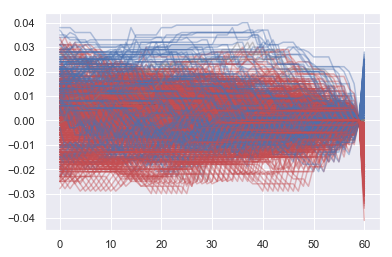

In [6]:
# 基準値との差分でplot
# up down で色付け
color_dict = {0: 'gray', 1: 'b', 2: 'r'}
threshold = 0.0
for i in range(1000):
    d = np.array(df_1016_slide.iloc[i])
    d -= d[-2]
    c = 2*(d[-1] < -threshold) + (d[-1] > threshold)
    plt.plot(d, c=color_dict[c], alpha=0.4)

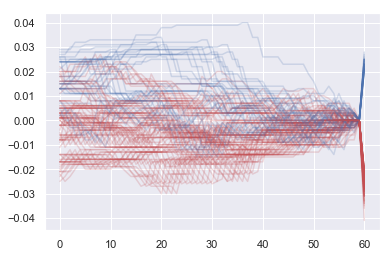

In [17]:
def slide_data(df, window_size, label_pos, inc_date=False):
    d = []
    # 各カラムのデータを準備
    if inc_date:
        d.append(('index_date', list(df['date'][window_size-1:-label_pos])))
    slide_d = {}
    for i in range(window_size)[::-1]:
        d.append((-i, list(df['price'][window_size-1-i:-label_pos-i])))
    d.append(('label', list(df['price'][window_size+label_pos-1:])))
    return pd.DataFrame({i: v for i, v in d})


def load_data(path, window_size, label_pos, inc_date=False):
    df = pd.read_csv(path, header=None).rename(columns={0: 'date', 1:'price'})
    return slide_data(df, window_size, label_pos, inc_date)


def plot_data(path, window_size, label_pos, threshold=0 ,inc_date=False):
    df = load_data(path, window_size, label_pos, inc_date)
    # 基準値との差分でplot
    # up down で色付け
    color_dict = {0: 'none', 1: 'b', 2: 'r'}
    for i in range(1000):
        d = np.array(df.iloc[i])
        d -= d[-2]
        c = 2*(d[-1] < -threshold) + (d[-1] > threshold)
        plt.plot(d, c=color_dict[c], alpha=0.2)
    plt.show()


plot_data('./data/USDJPY/20181016.csv', 60, 60, threshold=0.02)


## 案1
いろいろ見てると上下のはしのデータはup, downとして良さそう
とりあえず直前5分で+-0.2をとった点で予測させてみる
その日の中で端からなんばんめか予測させることでもできそうな


In [8]:
def predict(data, threshold=0.02):
    """
    data: np.array (#item, #window +1)
    """
    data -= data[:, -1, None]
    return 1+ 1*np.any(data>threshold, axis=1) - 1*np.any(data<-threshold, axis=1)

downのprecision0.635523613963039
upのprecision0.5610425240054869



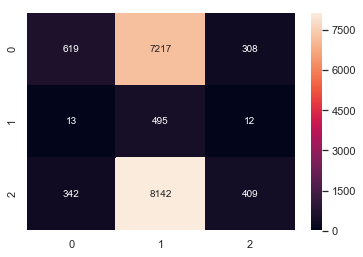

NameError: name 'df' is not defined

In [9]:
def test(df, threshold=0.02):
    df = df.copy()
    true_label = 1 +  np.array(1*(df[0]<df['label']) - 1*(df[0]>df['label']))
    predict_label = predict(df.to_numpy()[:, :-1], threshold=threshold)
    eye = np.eye(3)
    confusion_matrix = eye[true_label].T @ eye[predict_label]
    d_pre = confusion_matrix[0, 0] / confusion_matrix[:, 0].sum()
    u_pre = confusion_matrix[2, 2] / confusion_matrix[:, 2].sum()
    print(f'downのprecision{d_pre}\nupのprecision{u_pre}\n')
    sns.heatmap(confusion_matrix, annot=True, fmt='.0f')
    plt.show()
    return d_pre, u_pre

test(load_data('./data/USDJPY/20181023.csv', 60, 60), threshold=0.04)
df = pd.concat([ load_data('./data/USDJPY/' + p, 60, 60) for p in os.listdir('./data/USDJPY/') if os.path.isfile('./data/USDJPY/' + p) ])
test(df, threshold=0.08)

In [ ]:
l = []
for p in os.listdir('./data/USDJPY/'):
    if not os.path.isfile('./data/USDJPY/' + p):
        continue
    print(p)
    df = load_data('./data/USDJPY/' + p, 60, 60)
    diff = df.copy().to_numpy()[:, :-1]
    diff -= diff[:, -1, None]
    threshold = min(0.8*np.max(diff), -0.8*np.min(diff))
    print(threshold)
    l.append(test(df, threshold=threshold))


## 案2
大きく上がったデータ、大きく下がったデータ、その他で予測させてみる

In [23]:
threshold = 0.02
# df = pd.concat([ load_data('./data/USDJPY/' + p, 60, 60) for p in os.listdir('./data/USDJPY/') if os.path.isfile('./data/USDJPY/' + p) ])
M = df.copy().to_numpy()
n, d = M.shape
d -= 1
print(n, d)
# 0: down, 1: noise, 2: up
labels = 1 - 1*(M[:, -1] < M[:, -2]-threshold) + (M[:, -1] > M[:, -2]+threshold)
E = np.eye(3)
pivot = int(4*n/5)
X_train = M[:pivot, :-1]
y_train = labels[:pivot] 
X_test = M[pivot:, :-1]
y_test = labels[pivot:]

1391658 60


In [27]:
X_train

array([[110.917, 110.895, 110.899, ..., 110.9  , 110.9  , 110.902],
       [110.895, 110.899, 110.9  , ..., 110.9  , 110.902, 110.902],
       [110.899, 110.9  , 110.9  , ..., 110.902, 110.902, 110.902],
       ...,
       [111.781, 111.786, 111.786, ..., 111.768, 111.768, 111.768],
       [111.786, 111.786, 111.786, ..., 111.768, 111.768, 111.768],
       [111.786, 111.786, 111.786, ..., 111.768, 111.768, 111.768]])

In [28]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Dropout, Flatten, BatchNormalization, Activation, Dense, concatenate, Input
from keras import optimizers
from keras.utils import plot_model
from keras.callbacks import TensorBoard
import numpy as np
import pickle


model = Sequential()
model.add(Dense(100, input_dim=d, activation="relu"))
model.add(Dropout(0.6))
model.add(Dense(3, activation="softmax"))
model.summary()

adam = optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0, amsgrad=False)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
tbcb = TensorBoard(log_dir='./graph', histogram_freq=0, write_graph=True)
history = model.fit?
#(X_train, y_train, epochs=30, batch_size=100, verbose=1, validation_split=0.1)

W0807 15:41:02.043721 4467463616 nn_ops.py:4224] Large dropout rate: 0.6 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please ensure that this is intended.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 100)               6100      
_________________________________________________________________
dropout_4 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 3)                 303       
Total params: 6,403
Trainable params: 6,403
Non-trainable params: 0
_________________________________________________________________
